In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

# Importacion de un solo flujo de datos
from sklearn.pipeline import Pipeline

# El SVM es sensible a datos no escalados
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris.target == 0  # setosa #

In [4]:
from sklearn.base import BaseEstimator


class MyLinearEstimator(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)

    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        b = 0

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1
        X_t = X * t
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1 / 2 * (w * w).sum() + self.C * (((1 - X_t_sv.dot(w)) - b * t_sv).sum())
            self.Js.append(J)

            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum()

            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b <= 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

In [5]:
# svm_clf = MyLinearStimator(C=2, eta0 = 1, eta_d = 1000,
#                      random_state=42)
svm_clf = MyLinearEstimator(C=2, eta0=10, eta_d=1000, random_state=42)
svm_clf.fit(X, y)

MyLinearEstimator(C=2, eta0=10, eta_d=1000, random_state=42)

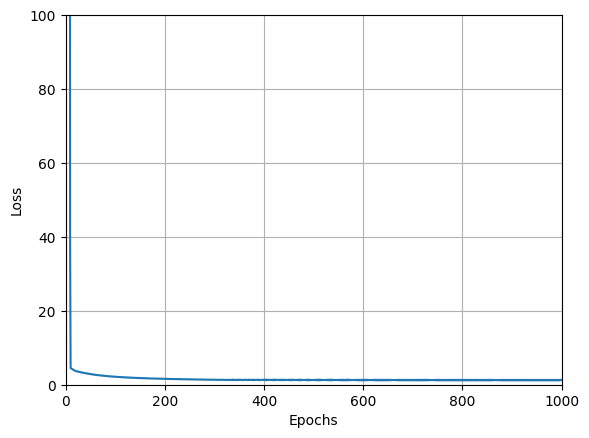

In [6]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [7]:
print(svm_clf.intercept_, svm_clf.coef_)

[3.79191894] [[[-1.3043743 ]
  [-0.80723038]]]


In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]

    # ---Para la clase se definieron las variables
    # ---upper y lower por gutter_up y gutter_down, respectivamente
    upper = decision_boundary + margin
    lower = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, upper, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, lower, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#AAA", zorder=-1)

In [9]:
from sklearn.svm import SVC

C = 2
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[3.78823471] [[-1.29411743 -0.82352928]]


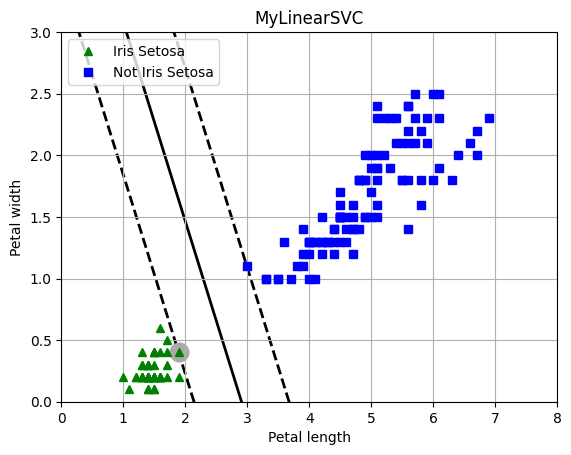

In [10]:
yr = y.ravel()
# fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], "g^", label="Iris Setosa")
plt.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], "bs", label="Not Iris Setosa")
plot_svc_decision_boundary(svm_clf, 0, 8)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("MyLinearSVC")
plt.axis([0, 8, 0, 3])
plt.legend(loc="upper left")
plt.grid()

plt.show()

In [11]:
print(svm_clf.support_vectors_)

[[1.9 0.4]]


In [12]:
print(svm_clf.predict(np.array([[1.5, 0.25], [1.5, 1]])))

[[ True]
 [ True]]
